## Observations and Insights 

In [673]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print(mouse_metadata.head())
print(study_results.head())

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
combined_df

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [674]:
#Getting better feel of what the data stats are
combined_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [675]:
# Checking the number of mice.
print(f"Number of rows in combined data frame: {len(combined_df['Mouse ID'])}")
print(f"Number of Mice: {len(combined_df['Mouse ID'].unique())}")

Number of rows in combined data frame: 1893
Number of Mice: 249


In [676]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_row_df = combined_df[combined_df.duplicated((['Mouse ID', 'Timepoint']), keep='first')]
dup_array = duplicate_row_df['Mouse ID']
for mice in dup_array:
    print(f"Duplicate mice found: {mice}")

Duplicate mice found: g989
Duplicate mice found: g989
Duplicate mice found: g989
Duplicate mice found: g989
Duplicate mice found: g989


In [677]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_row_df = combined_df[combined_df.duplicated((['Mouse ID', 'Timepoint']), keep='first')]
duplicate_row_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [678]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_unique_df = combined_df.sort_values(['Mouse ID','Timepoint'], ascending=True).drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_unique_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [679]:
# Checking the number of mice in the clean DataFrame. Should have same # of mice as original combined dataframe
print(f"Number of Mice in clean dataframe: {len(clean_unique_df['Mouse ID'].unique())}")

Number of Mice in clean dataframe: 249


## Summary Statistics

In [680]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

regimen_list = clean_unique_df['Drug Regimen'].unique()

regimen_list_length = len(regimen_list)
print(f"Number of Drug Regimens in dataframe: {regimen_list_length}")
print(f"Drug Regimen List: {regimen_list}")

Number of Drug Regimens in dataframe: 10
Drug Regimen List: ['Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn' 'Zoniferol' 'Ramicane'
 'Ketapril' 'Propriva' 'Naftisol' 'Capomulin']


In [681]:
# create sub dataframes from main dataframe using groupby for each Drug Regimen
regimen_df_list = [x[1] for x in clean_unique_df.groupby('Drug Regimen', sort=False)]
#print first sub dataframe to check
regimen_df_list[0]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [682]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

statistics_tumor_df = pd.DataFrame(columns=['Regimen','Mean', 'Median', 'Variance', 'Std Dev', 'SEM'])
statistics_tumor_df

,Regimen,Mean,Median,Variance,Std Dev,SEM


In [683]:
for i in regimen_list:
    
    regimen = regimen_df_list[0]['Tumor Volume (mm3)']

    mean_numpy = np.mean(regimen)
    print(f"Mean: {mean_numpy}")

    median_numpy = np.median(regimen)
    print(f"Median: {median_numpy}")

    #mode_scipy = st.mode(regimen)
    #print(f"Mode: {mode_scipy}")

    variance_numpy = np.var(regimen)
    print(f"Variance: {variance_numpy}")

    stddev_numpy = np.std(regimen)
    print(f"Std Dev: {stddev_numpy}")

    sem = regimen_df_list[0]['Tumor Volume (mm3)'].sem(axis = 0)
    print(f"SEM: {sem}")

    row = [{'Regimen':i,'Mean':mean_numpy,'Median':median_numpy,'Variance':variance_numpy,'Std Dev':stddev_numpy,'SEM':sem}]
    print(row)
    statistics_tumor_df = statistics_tumor_df.append(pd.DataFrame(row, columns=statistics_tumor_df.columns))
    
statistics_tumor_df.set_index('Regimen', inplace=True)
statistics_tumor_df.head()

Mean: 52.88479510859551
Median: 51.82058438
Variance: 42.88638815058418
Std Dev: 6.54876997233711
SEM: 0.4922356938011383
[{'Regimen': 'Infubinol', 'Mean': 52.88479510859551, 'Median': 51.82058438, 'Variance': 42.88638815058418, 'Std Dev': 6.54876997233711, 'SEM': 0.4922356938011383}]
Mean: 52.88479510859551
Median: 51.82058438
Variance: 42.88638815058418
Std Dev: 6.54876997233711
SEM: 0.4922356938011383
[{'Regimen': 'Placebo', 'Mean': 52.88479510859551, 'Median': 51.82058438, 'Variance': 42.88638815058418, 'Std Dev': 6.54876997233711, 'SEM': 0.4922356938011383}]
Mean: 52.88479510859551
Median: 51.82058438
Variance: 42.88638815058418
Std Dev: 6.54876997233711
SEM: 0.4922356938011383
[{'Regimen': 'Ceftamin', 'Mean': 52.88479510859551, 'Median': 51.82058438, 'Variance': 42.88638815058418, 'Std Dev': 6.54876997233711, 'SEM': 0.4922356938011383}]
Mean: 52.88479510859551
Median: 51.82058438
Variance: 42.88638815058418
Std Dev: 6.54876997233711
SEM: 0.4922356938011383
[{'Regimen': 'Stelasyn'

,Mean,Median,Variance,Std Dev,SEM
Regimen,,,,,
Infubinol,52.884795,51.820584,42.886388,6.54877,0.492236
Placebo,52.884795,51.820584,42.886388,6.54877,0.492236
Ceftamin,52.884795,51.820584,42.886388,6.54877,0.492236
Stelasyn,52.884795,51.820584,42.886388,6.54877,0.492236
Zoniferol,52.884795,51.820584,42.886388,6.54877,0.492236


## Bar and Pie Charts

In [684]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

bar_plot_data = clean_unique_df.groupby('Drug Regimen', sort=False)
#bar_plot_data['Mice'] = bar_plot_data['Mouse ID'].count()
bar_plot_data = bar_plot_data['Mouse ID'].count()

In [685]:
bar_plot_data_df = pd.DataFrame({"Mice": bar_plot_data})
bar_plot_data_df

,Mice
Drug Regimen,
Infubinol,178
Placebo,181
Ceftamin,178
Stelasyn,181
Zoniferol,182
Ramicane,228
Ketapril,188
Propriva,156
Naftisol,186


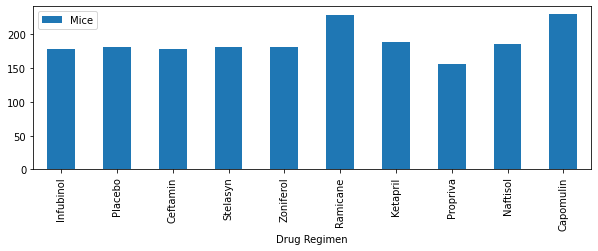

In [686]:
bar_plot_data_df.plot(kind='bar', figsize=(10,3))


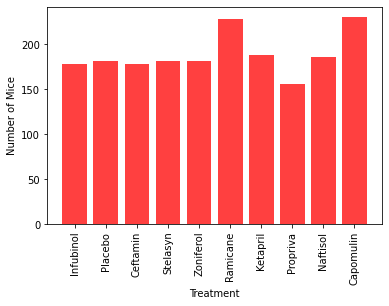

In [687]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(bar_plot_data_df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, bar_plot_data, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, bar_plot_data_df.index,rotation=90)
#plt.title("Mice for each treatment")
plt.xlabel("Treatment")
plt.ylabel("Number of Mice")
plt.show()

In [688]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_plot_data = clean_unique_df.groupby('Sex', sort=False)
pie_plot_data = pie_plot_data['Sex'].count()
pie_plot_data

Sex
Female    930
Male      958
Name: Sex, dtype: int64

In [689]:
pie_plot_data_df = pd.DataFrame({"Mice": pie_plot_data})
pie_plot_data_df

,Mice
Sex,
Female,930
Male,958


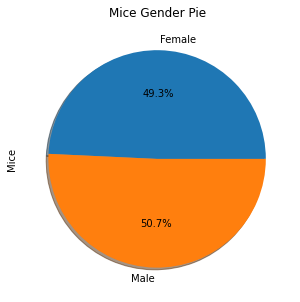

In [690]:
pie_plot_data_df.plot(kind = 'pie', y = 'Mice', figsize=(5, 5), title="Mice Gender Pie", legend=False,
                   autopct='%1.1f%%', explode=(0, 0), 
                   shadow=True, startangle=0)


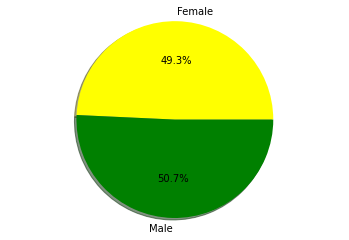

In [691]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["yellow","green"]
plt.pie(pie_plot_data_df['Mice'], explode=(0,0), labels=pie_plot_data_df.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
#plt.title("Mice Gender Pie")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [692]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_df = clean_unique_df.groupby(['Mouse ID','Drug Regimen'])
final_time_vol = final_df['Timepoint'].max()
final_time_vol

Mouse ID  Drug Regimen
a203      Infubinol       45
a251      Infubinol       45
a262      Placebo         45
a275      Ceftamin        45
a366      Stelasyn        30
                          ..
z435      Propriva        10
z578      Ramicane        45
z581      Infubinol       45
z795      Naftisol        45
z969      Naftisol        45
Name: Timepoint, Length: 249, dtype: int64

In [693]:
final_tumor_vol_df = pd.DataFrame({"Timepoint": final_time_vol})
final_tumor_vol_df.reset_index(inplace=True)
final_tumor_vol_df.sort_values(by='Mouse ID', ascending=True)
final_tumor_vol_df

,Mouse ID,Drug Regimen,Timepoint
0,a203,Infubinol,45
1,a251,Infubinol,45
2,a262,Placebo,45
3,a275,Ceftamin,45
4,a366,Stelasyn,30
...,...,...,...
244,z435,Propriva,10
245,z578,Ramicane,45
246,z581,Infubinol,45
247,z795,Naftisol,45


In [694]:
four_regimens_df = final_tumor_vol_df.loc[(final_tumor_vol_df['Drug Regimen'] == 'Capomulin') |
                                         (final_tumor_vol_df['Drug Regimen'] == 'Ramicane') |
                                         (final_tumor_vol_df['Drug Regimen'] == 'Infubinol') |
                                         (final_tumor_vol_df['Drug Regimen'] == 'Ceftamin') ]
four_regimens_df

,Mouse ID,Drug Regimen,Timepoint
0,a203,Infubinol,45
1,a251,Infubinol,45
3,a275,Ceftamin,45
6,a411,Ramicane,45
7,a444,Ramicane,45
...,...,...,...
239,y769,Ceftamin,45
240,y793,Capomulin,45
241,y865,Ceftamin,45
245,z578,Ramicane,45


In [695]:
result_df = pd.merge(four_regimens_df, clean_unique_df, on=['Mouse ID', 'Drug Regimen', 'Timepoint'])
result_df

,Mouse ID,Drug Regimen,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,45,Female,20,23,67.973419,2
1,a251,Infubinol,45,Female,21,25,65.525743,1
2,a275,Ceftamin,45,Female,20,28,62.999356,3
3,a411,Ramicane,45,Male,3,22,38.407618,1
4,a444,Ramicane,45,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,45,Female,6,27,68.594745,4
96,y793,Capomulin,45,Male,17,17,31.896238,2
97,y865,Ceftamin,45,Male,23,26,64.729837,3
98,z578,Ramicane,45,Male,11,16,30.638696,0


In [696]:
#df.drop(df.columns[[0, 4, 2]], axis = 1, inplace = True)
result_df.drop(result_df.columns[[0,2,3,4,5,7]], axis = 1, inplace = True)
result_df

,Drug Regimen,Tumor Volume (mm3)
0,Infubinol,67.973419
1,Infubinol,65.525743
2,Ceftamin,62.999356
3,Ramicane,38.407618
4,Ramicane,43.047543
...,...,...
95,Ceftamin,68.594745
96,Capomulin,31.896238
97,Ceftamin,64.729837
98,Ramicane,30.638696


In [700]:
capomulin_df = result_df.loc[(result_df['Drug Regimen'] == 'Capomulin')]
capomulin_df.set_index('Drug Regimen', inplace=True)
capomulin_df.reset_index(drop=True, inplace=True)
ramicane_df = result_df.loc[(result_df['Drug Regimen'] == 'Ramicane')]
ramicane_df.set_index('Drug Regimen', inplace=True)
ramicane_df.reset_index(drop=True, inplace=True)
infubinol_df = result_df.loc[(result_df['Drug Regimen'] == 'Infubinol')]
infubinol_df.set_index('Drug Regimen', inplace=True)
infubinol_df.reset_index(drop=True, inplace=True)
ceftamin_df = result_df.loc[(result_df['Drug Regimen'] == 'Ceftamin')]
ceftamin_df.set_index('Drug Regimen', inplace=True)
ceftamin_df.reset_index(drop=True, inplace=True)

four_regimen_tumor_vol_df = pd.DataFrame({"Capomulin": capomulin_df['Tumor Volume (mm3)'],
                                         "Ramicane": ramicane_df['Tumor Volume (mm3)'],
                                         "Infubinol": infubinol_df['Tumor Volume (mm3)'],
                                         "Ceftamin": ceftamin_df['Tumor Volume (mm3)']})
four_regimen_tumor_vol_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


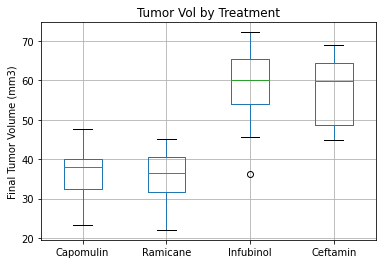

In [706]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Vol by Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
#ax1.boxplot(four_regimen_tumor_vol_df)
four_regimen_tumor_vol_df.boxplot(column=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
